In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
url='http://bit.ly/w-data'
data=pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

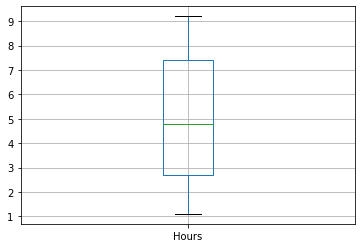

In [7]:
data.boxplot('Hours')

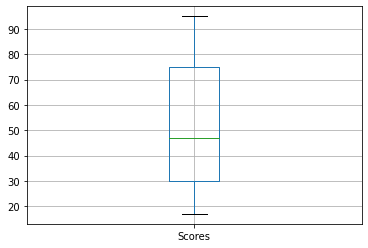

In [8]:
data.boxplot('Scores')

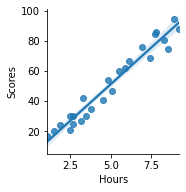

In [11]:
sns.pairplot(data,x_vars='Hours',y_vars='Scores',kind='reg')

In [27]:
X=data.iloc[:, :-1]
Y=data.iloc[:,1]

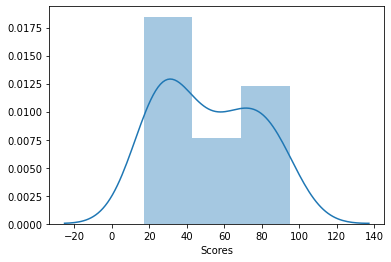

In [28]:
#Checking Linearity

sns.distplot(Y,hist=True)

In [29]:
#Splitting Data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [30]:
print(X_train.size)
print(Y_test.size)

20
5


In [31]:
#Making Model


from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,Y_train)

LinearRegression()

In [32]:
print(lm.intercept_)
print(lm.coef_)

2.6499651894038863
[9.81430544]


In [33]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[17.37142335 52.70292295 35.03717315 34.05574261 46.81433968]


In [35]:
new_df=pd.DataFrame()
new_df=X_test

In [36]:
new_df['Actual Sales'] =Y_test
new_df['Predicted Sales']=Y_pred

<ipython-input-36-017da845368e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Actual Sales'] =Y_test
<ipython-input-36-017da845368e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Predicted Sales']=Y_pred


In [37]:
new_df

,Hours,Actual Sales,Predicted Sales
5,1.5,20,17.371423
1,5.1,47,52.702923
13,3.3,42,35.037173
2,3.2,27,34.055743
12,4.5,41,46.814340


In [38]:
new_df['Deviation']= new_df['Actual Sales'] - new_df['Predicted Sales']
new_df

<ipython-input-38-4d79aa4cbf56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Deviation']= new_df['Actual Sales'] - new_df['Predicted Sales']


,Hours,Actual Sales,Predicted Sales,Deviation
5,1.5,20,17.371423,2.628577
1,5.1,47,52.702923,-5.702923
13,3.3,42,35.037173,6.962827
2,3.2,27,34.055743,-7.055743
12,4.5,41,46.814340,-5.814340


In [39]:
# Evaluating Model

from sklearn.metrics import r2_score , mean_squared_error

r2 = r2_score(Y_test,Y_pred)
print("R-square value is  :  ",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Value :  ", rmse)

adjr2 = 1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R-square is : ", adjr2)

R-square value is  :   0.6683995499740194
Root Mean Squared Value :   5.856684262506168
Adjusted R-square is :  0.6539821391033246
